## MNIST Handwritten Digit Classification using Deep Learning (Neural Network)

**Importing the Dependencies**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST Data from keras.datasets**

In [5]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [7]:
# shape of the numpy array
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

image dimension = 28 * 28

In [8]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


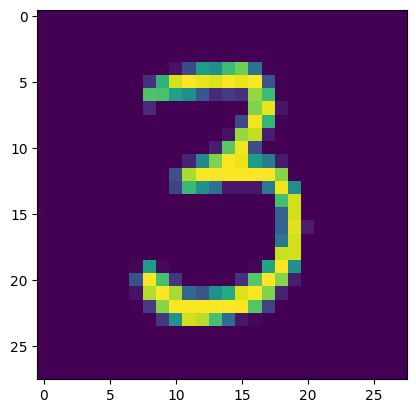

3


In [11]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(y_train[50])

**Image labels**

In [12]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [14]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can use also apply One Hot Encoding

All the images have the same dimensions in this dataset, if not, we have to resize all the images to a common dimension

In [15]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [16]:
# print the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [18]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [19]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# training the neural network
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1370 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1008 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0816 - accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0400 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

Training data accuracy = 98.8%

**Accuracy of Test data**

In [21]:
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9738


Test data accuracy = 97%

In [22]:
print(X_test.shape)

(10000, 28, 28)


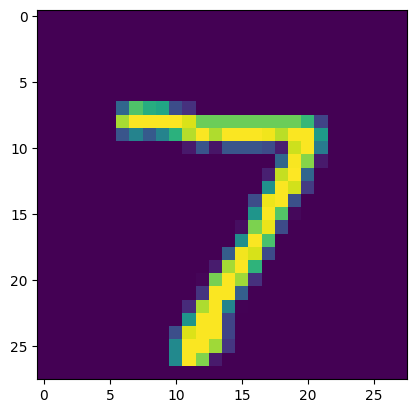

In [23]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [24]:
print(y_test[0])

7


In [25]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
y_pred.shape

(10000, 10)

In [28]:
print(y_pred[0])

[3.8767786e-04 5.6972896e-04 6.3839488e-02 9.2494923e-01 5.4167121e-08
 2.6354627e-03 1.0039063e-11 9.9999940e-01 6.2089484e-02 5.5517122e-02]


model.predict() gives the prediction probability of each class for that data point

In [30]:
# Converting the prediction probabilites to class

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [31]:
# converting the prediction probability to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test = True labels

y_pred_labels = predicted labels

**Confusion Matrix**

In [32]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 966    0    1    1    3    5    1    1    2    0]
 [   0 1125    3    3    0    1    1    0    2    0]
 [   4    1 1003    5    3    1    1    7    6    1]
 [   0    0    2  977    0   16    0    7    3    5]
 [   1    1    3    1  954    0    6    2    2   12]
 [   1    0    0    7    1  876    1    1    3    2]
 [   6    2    0    1    6   15  925    0    3    0]
 [   2    4   13    3    2    0    0  997    2    5]
 [   5    0    1    7    6    9    0    1  940    5]
 [   2    2    0    3   12    5    0    7    3  975]], shape=(10, 10), dtype=int32)


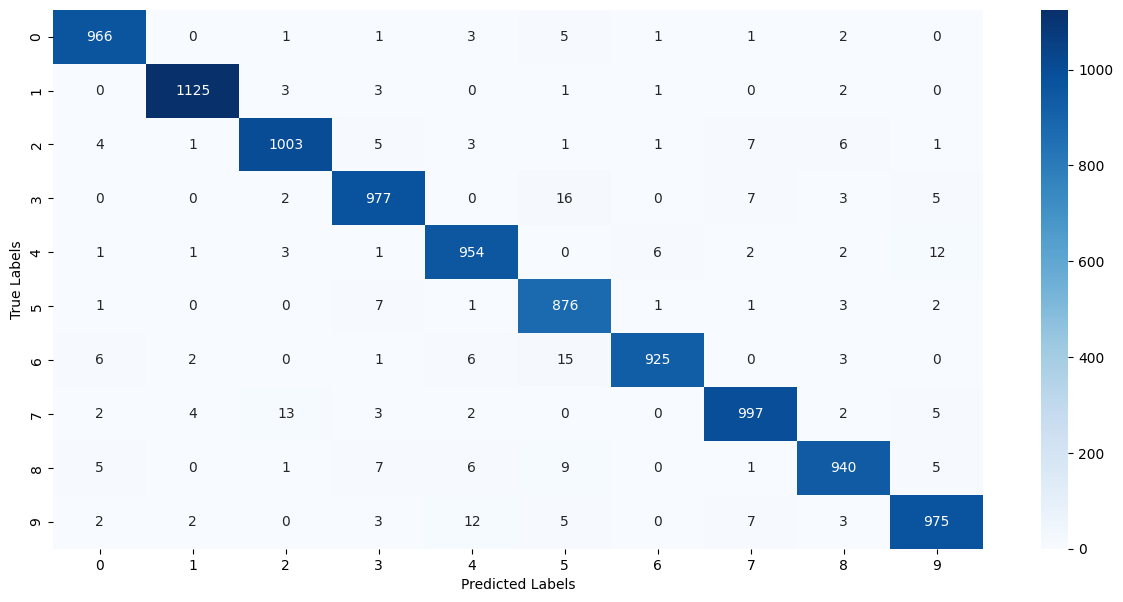

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

**Building a predictive System**

In [34]:
input_image = cv2.imread('3.png')

In [35]:
type(input_image)

numpy.ndarray

In [36]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [37]:
cv2.imshow('img',input_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
input_image.shape

(318, 318, 3)

In [39]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(318, 318)

In [41]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [42]:
input_image_resize.shape

(28, 28)

In [43]:
cv2.imshow('img',input_image_resize)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
input_image_resize = input_image_resize/255

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [46]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 23ms/step
[[3.9243999e-09 8.2798791e-04 1.9787776e-03 1.0000000e+00 1.1677685e-14
  1.6701049e-01 7.0719517e-19 5.5607484e-04 1.3714315e-01 8.3984888e-01]]


In [47]:
input_pred_label = np.argmax(input_prediction)

In [48]:
print(input_pred_label)

3


**Predictive system**

In [49]:
input_image = cv2.imread('3.png')

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The hand written digit is recognized as: ', input_pred_label)

1/1 [==============================] - 0s 22ms/step
The hand written digit is recognized as:  3
